In [1]:
#PART 1

In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [391]:
#import pandas as pd
#import json

#with open('data1.json') as json_file:
#    data = json.load(json_file)

#data=pd.read_csv("data11.csv", header=0, delimiter="\t")
#data=pd.read_csv("data11.csv", header=-1)

#data=pd.read_csv("data11.csv", header=None, index_col=None, skiprows=[1])
#data=pd.read_csv("data11.csv", header=None, index_col=None, usecols=[1], squeeze=True)

#data=pd.read_csv("data11.csv", header=None, squeeze=True)
#data=pd.read_csv("data2.csv", header=None, squeeze=True)
data=pd.read_csv("data4.csv", header=None, squeeze=True)

In [392]:
data

0      You work hard. Heat is expensive. Could we lig...
1      Livin in a hotel ain’t really that expensive w...
2            @BNNBloomberg 22.97 PE is not too expensive
3                RT @yoonmin_lifeu2: Therapy: expensive 
4      This vid of Yoongi being a happy bean: free ht...
5      @HotTopic OMG this is awesome but it's SO expe...
6      @atrupar San Francisco, by some measures, is t...
7      Bruh the jsb mobile gatcha is so expensive lma...
8      This is smart? “The [colleges] that are expens...
9      i wish i knew which one of you dirty gutter as...
10     @Emmalrowley @brumhippodrome @TheMattSlack She...
11       @bangtanmighty @BTS_twt EXPENSIVE GIRL @BTS_twt
12     Kanye’s publicity nightmares never seems to ge...
13     Y’all I’m addicted to cheese but the fancy kin...
14     Day 31 in America:\r\nNo point in getting your...
15     No point in getting your ID checked if you're ...
16                                   The Beaver follows.
17                         It r

In [393]:
data[0]

'You work hard. Heat is expensive. Could we lighten your load? Probably! Just stop by and see. 156 Broad St. Lynn! Serving Lynn, Lynnfield, Nahant, Saugus, Swampscott and Wakefield. #Heat #Necessity #warmup #LEOloves https://t.co/rQl5aVK7gJ'

In [394]:
data[1]

'Livin in a hotel ain’t really that expensive when you calculate all the shit you don’t gotta pay for cause it come with the room. I’m back on my 2015 shit bookin em by the week.'

In [395]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')

lemmatizer = WordNetLemmatizer()

def penn_to_wn(tag):
    
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def clean_text(text):
    text = text.replace("<br />", " ")
    text = text.decode("utf-8")
    return text

def swn_polarity(text):
    
    sentiment = 0.0
    tokens_count = 0
    
    #text = clean_text(text)
    
    raw_sentences = sent_tokenize(text)
    for raw_sentence in raw_sentences:
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        
        for word, tag in tagged_sentence:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
                
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
                
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
             
            # take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            #sentiment += swn_synset.obj_score()
            #sentiment += swn_synset.neg_score()
            tokens_count += 1
        
    if not tokens_count:
        return 0
    
    # positive sentiment
    if sentiment >= 0:
        #return 1
        return sentiment
    
    # negative sentiment
    #return 0
    return sentiment 
    
#print swn_polarity(data[1])

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [212]:
#print(swn_polarity(data[1]))
sentence = "Iphone6 camera is awesome for low light "
#sentence = "this movie is wonderful"
#swn_polarity(sentence)

#sentence = "Figures | How auto sector slowdown has affected Maruti Suzuki's top selling cars #MarutiSuzuki #Figures #AutoSector"
#sentence = "@kaul_vivek What people want is the explanation of $3 billion festive sales in the times of slowdown?"
swn_polarity(sentence)

#swn_polarity(data[2])

0.5

In [396]:
swn_polarity(data[0])

0.5

In [397]:
sentiments = [swn_polarity(data[i]) for i in range(len(data))]

In [398]:
sentiments

[0.5,
 0.625,
 -0.25,
 0.5,
 1.25,
 1.25,
 -0.125,
 1.125,
 1.5,
 -0.5,
 0.5,
 0.0,
 -0.375,
 0.125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.375,
 0.25,
 0.875,
 0.5,
 0.5,
 1.5,
 0.25,
 1.125,
 -0.25,
 -0.125,
 0.5,
 0.0,
 -1.125,
 0.5,
 0.5,
 0.0,
 -1.625,
 0.375,
 0.25,
 0.25,
 1.375,
 0.625,
 -0.125,
 0.5,
 -0.25,
 0.375,
 1.5,
 0.25,
 0.0,
 0.25,
 0.875,
 0.875,
 0,
 0.0,
 0.5,
 0.125,
 1.0,
 0.5,
 0.375,
 0.5,
 0.0,
 0.5,
 0.0,
 0.25,
 0.0,
 0.5,
 0.0,
 -0.5,
 0.5,
 0.625,
 1.0,
 0.5,
 0.75,
 0.875,
 0.0,
 0.0,
 0.75,
 0.0,
 0.5,
 0.5,
 0.0,
 0.875,
 0.5,
 0.125,
 0.5,
 0.5,
 0.375,
 -0.125,
 0.0,
 0.125,
 0.5,
 -0.25,
 -0.25,
 1.5,
 -0.25,
 -0.125,
 0.5,
 1.5,
 -0.25,
 0.0,
 0.125,
 1.125,
 0.5,
 0.0,
 -0.125,
 0.0,
 0.0,
 0.625,
 0.0,
 -0.25,
 0.125,
 0.75,
 0.0,
 0.0,
 0.5,
 0.375,
 0.375,
 0.625,
 0,
 -0.25,
 -0.25,
 0.375,
 0.0,
 0.75,
 0.0,
 0.5,
 0.875,
 -0.625,
 0.5,
 0.375,
 0.5,
 0.125,
 0.75,
 -0.5,
 0.5,
 0.0,
 0.625,
 0.25,
 -0.25,
 -0.25,
 0.625,
 0.875,
 -0.625,
 0

In [400]:
df = pd.DataFrame(sentiments) 
#df.to_csv(r'C:\Users\OREN\.git\tweepy\sentiments11.csv', index=False) 

In [16]:
df

,0
0,0.25
1,0.00
2,0.00


In [401]:
#df.to_csv(r'C:\Users\OREN\.git\tweepy\sentiments11.csv', index=False) 
df.to_csv(r'sentiments4.csv', header=False, index=False) 

In [ ]:
#PART 2

In [621]:
#data=pd.read_csv("alldata11.csv", header=1, squeeze=True)
#data1=pd.read_csv("alldata11.csv") #alldata11 include annual inflation in each month
#data1=pd.read_csv("alldata12.csv") #alldata12 include monthly inflation

#data1=pd.read_csv("alldata41.csv") #alldata11 include annual inflation in each month
data1=pd.read_csv("alldata4.csv") #alldata11 include annual inflation in each month
#data1=pd.read_csv("alldata22.csv") #alldata11 include annual inflation in each month

In [622]:
data1

,sentiment,unemploy,inflation
0,0.500,4.7,2.5
1,0.625,4.4,2.7
2,-0.250,4.4,2.4
3,0.500,4.4,2.2
4,1.250,4.3,1.9
5,1.250,4.3,1.6
6,-0.125,4.4,1.7
7,1.125,4.2,1.9
8,1.500,4.1,2.2
9,-0.500,4.2,2.0


In [404]:
data1.head

<bound method NDFrame.head of      sentiment  unemploy  inflation
0        0.500       4.7        2.5
1        0.625       4.4        2.7
2       -0.250       4.4        2.4
3        0.500       4.4        2.2
4        1.250       4.3        1.9
5        1.250       4.3        1.6
6       -0.125       4.4        1.7
7        1.125       4.2        1.9
8        1.500       4.1        2.2
9       -0.500       4.2        2.0
10       0.500       4.1        2.2
11       0.000       4.1        2.1
12      -0.375       4.1        2.1
13       0.125       4.0        2.2
14       0.000       3.9        2.4
15       0.000       3.8        2.5
16       0.000       4.0        2.8
17       0.000       3.9        2.9
18       0.250       3.8        2.9
19       0.000       3.7        2.7
20       0.375       3.8        2.3
21       0.250       3.7        2.5
22       0.875       3.9        2.2
23       0.500       4.0        1.9
24       0.500       3.8        1.6
25       1.500       3.8        1.

In [405]:
data1['sentiment']

0      0.500
1      0.625
2     -0.250
3      0.500
4      1.250
5      1.250
6     -0.125
7      1.125
8      1.500
9     -0.500
10     0.500
11     0.000
12    -0.375
13     0.125
14     0.000
15     0.000
16     0.000
17     0.000
18     0.250
19     0.000
20     0.375
21     0.250
22     0.875
23     0.500
24     0.500
25     1.500
26     0.250
27     1.125
28    -0.250
29    -0.125
       ...  
959    0.250
960   -0.250
961    0.875
962    0.000
963    0.000
964    0.500
965    0.125
966    1.000
967    0.500
968    0.000
969    0.500
970    2.250
971   -1.250
972    0.500
973    0.250
974    0.750
975    0.500
976   -0.125
977    0.125
978    0.125
979    1.750
980    1.125
981    0.125
982   -0.375
983   -0.500
984    0.375
985    0.375
986    1.000
987    1.125
988   -1.750
Name: sentiment, Length: 989, dtype: float64

In [623]:
from sklearn.svm import SVR
#regressor_lin=SVR(kernel='linear', C=100, gamma='auto')

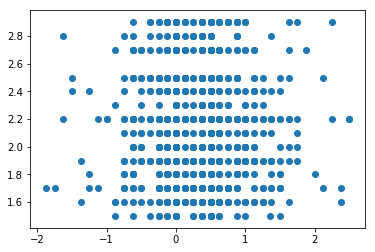

In [624]:
import matplotlib.pyplot as plt
plt.scatter(data1['sentiment'], data1['inflation'])

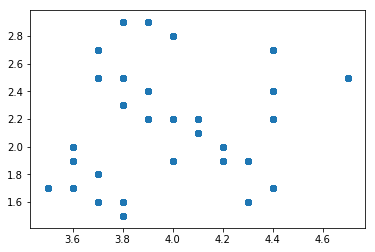

In [625]:
plt.scatter(data1['unemploy'], data1['inflation'])

In [700]:
from sklearn.model_selection import train_test_split

columnx = "sentiment unemploy".split()
X = pd.DataFrame(data1, columns=columnx)

#X = data1['sentiment']

#columny = "inflation".split()
#y = pd.DataFrame(data1, columns=columny).reshape(-1,1)
y = data1['inflation']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)



In [445]:
X

,sentiment,unemploy
0,0.500,4.7
1,0.625,4.4
2,-0.250,4.4
3,0.500,4.4
4,1.250,4.3
5,1.250,4.3
6,-0.125,4.4
7,1.125,4.2
8,1.500,4.1
9,-0.500,4.2


In [411]:
y

0      2.5
1      2.7
2      2.4
3      2.2
4      1.9
5      1.6
6      1.7
7      1.9
8      2.2
9      2.0
10     2.2
11     2.1
12     2.1
13     2.2
14     2.4
15     2.5
16     2.8
17     2.9
18     2.9
19     2.7
20     2.3
21     2.5
22     2.2
23     1.9
24     1.6
25     1.5
26     1.9
27     2.0
28     1.8
29     1.6
      ... 
959    2.4
960    2.2
961    1.9
962    1.6
963    1.7
964    1.9
965    2.2
966    2.0
967    2.2
968    2.1
969    2.1
970    2.2
971    2.4
972    2.5
973    2.8
974    2.9
975    2.9
976    2.7
977    2.3
978    2.5
979    2.2
980    1.9
981    1.6
982    1.5
983    1.9
984    2.0
985    1.8
986    1.6
987    1.8
988    1.7
Name: inflation, Length: 989, dtype: float64

In [101]:
Xtrain

,sentiment,unemploy
4,2.75,0.037
2,2.50,0.035
5,1.50,0.037
3,1.50,0.036


In [102]:
Xtest

,sentiment,unemploy
1,11.375,0.037
0,9.250,0.037


In [103]:
ytrain

4    0.016
2    0.017
5    0.018
3    0.017
Name: inflation, dtype: float64

In [104]:
ytest

1    0.018
0    0.016
Name: inflation, dtype: float64

In [587]:
from sklearn import model_selection

#SVR(kernel='linear', C=100, gamma='auto')
est=SVR(kernel='linear', gamma='auto')

gs_lin = model_selection.GridSearchCV(
    est,
    {"C": range(1,110)},
    cv=5,  # 5-fold cross validation
    n_jobs=2,  # run each hyperparameter in one of two parallel jobs
    scoring='neg_mean_squared_error'
)

gs_lin.fit(Xtrain, ytrain )
print (gs_lin.best_params_)

{'C': 2}


In [701]:
#regressor_lin=SVR(kernel='linear', C=100, gamma='auto')
regressor_lin=SVR(kernel='linear', C=2, gamma='auto')

In [702]:
regressor_lin.fit(Xtrain, ytrain )

SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [703]:
pred_lin = regressor_lin.predict(Xtest)

In [704]:
pred_lin

array([1.94557571, 2.08178508, 1.99092786, 2.39972416, 2.0817545 ,
       2.0363106 , 1.90008594, 2.12716781, 2.17261171, 2.12722898,
       1.99083612, 2.21802503, 2.26349951, 2.0817545 , 2.39973946,
       2.081571  , 1.9908667 , 1.94557571, 1.99082083, 1.89988716,
       2.12721369, 1.94557571, 1.94543809, 2.12715252, 2.26339247,
       1.9908667 , 1.90000949, 1.9908667 , 2.21810148, 1.99079024,
       2.26349951, 1.99092786, 1.85459617, 1.9454228 , 2.39986178,
       2.08164746, 1.90007065, 2.03615769, 1.94545338, 1.9452546 ,
       2.26343834, 2.21799444, 2.08172391, 2.39973946, 1.90007065,
       1.94549926, 2.2635148 , 1.90002478, 1.99092786, 1.99092786,
       1.94543809, 1.85456559, 2.21793328, 1.99095845, 2.08178508,
       1.99092786, 1.94545338, 1.94548397, 2.12715252, 2.12730543,
       1.90000949, 2.21800974, 1.94543809, 1.9908667 , 2.12727485,
       1.94545338, 1.99088199, 1.85464204, 1.90000949, 1.9001471 ,
       2.26343834, 2.12722898, 1.94531576, 2.12724427, 2.08170

In [705]:
print(regressor_lin.score(Xtest, ytest))

-0.010083390828697691


In [673]:
from sklearn.metrics import r2_score

In [674]:
print(r2_score(ytest, pred_lin))

-0.1816821743874757


In [675]:
from sklearn.metrics import mean_squared_error

In [676]:
print(mean_squared_error(ytest, pred_lin))

0.17746362072098373


In [53]:
#from sklearn import model_selection

#SVR(kernel='linear', C=100, gamma='auto')
est=SVR(kernel='rbf')

gs_rbf = model_selection.GridSearchCV(
    est,
    {"C": range(1,110), "epsilon": range(0,2), "gamma": range(0,2)},
    cv=5,  # 5-fold cross validation
    n_jobs=2,  # run each hyperparameter in one of two parallel jobs
    scoring='neg_mean_squared_error'
)

gs_rbf.fit(Xtrain, ytrain )
print (gs_rbf.best_params_)

{'C': 1, 'epsilon': 0, 'gamma': 0}


In [677]:
#regressor_rbf = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.1)
regressor_rbf = SVR(kernel='rbf', C=1, epsilon=0.1, gamma=0.1)

In [678]:
regressor_rbf.fit(Xtrain, ytrain )

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [679]:
pred_rbf = regressor_rbf.predict(Xtest)

In [680]:
pred_rbf

array([2.23723861, 2.00168991, 1.99633148, 2.26846813, 2.14893183,
       2.23740008, 2.19665268, 2.19665268, 2.09473489, 2.21126695,
       2.08590174, 1.93928454, 1.88574878, 2.27546935, 2.05118661,
       2.09942425, 2.25897564, 2.39205652, 2.27546935, 2.05080814,
       2.14194166, 2.09862359, 1.95117371, 2.17562662, 2.19122904,
       2.28391485, 2.09862359, 2.00168991, 2.27546935, 1.99633148,
       2.0480894 , 2.28375752, 2.24125551, 1.93398332, 1.93928454,
       1.95112867, 2.0523197 , 2.09862359, 1.93928454, 1.91241911,
       2.10202475, 2.39977606, 2.00201326, 1.89659269, 2.06445981,
       2.10605545, 2.1793556 , 2.1363155 , 2.14973715, 2.14617592,
       2.2805965 , 2.0480894 , 2.19665268, 1.88052407, 1.99070096,
       1.89659269, 1.89016947, 2.04095451, 2.15013748, 1.95077318,
       1.91241911, 1.94152773, 2.24930041, 2.14194166, 2.12129513,
       2.10136978, 1.95069476, 2.14617592, 2.00201326, 2.27563205,
       2.14973715, 2.12129513, 1.96790535, 2.07139581, 2.23438

In [681]:
print(regressor_rbf.score(Xtest, ytest))

-0.11522050942055562


In [682]:
print(r2_score(ytest, pred_rbf))

-0.11522050942055562


In [683]:
print(mean_squared_error(ytest, pred_rbf))

0.16748248707962346


In [ ]:
#from sklearn import model_selection

#SVR(kernel='linear', C=100, gamma='auto')
est=SVR(kernel='poly')

gs_pol = model_selection.GridSearchCV(
    est,
    {"C": range(1,110), "epsilon": range(0,2), "degree": range(0,10), "coef0":range(0,2)},
    cv=5,  # 5-fold cross validation
    n_jobs=2,  # run each hyperparameter in one of two parallel jobs
    scoring='neg_mean_squared_error'
)

gs_pol.fit(Xtrain, ytrain )
print (gs_pol.best_params_)

In [684]:
#regressor_pol = SVR(kernel='poly', C=100, epsilon=0.1, gamma='auto', degree=3)
regressor_pol = SVR(kernel='poly', C=1, epsilon=0.1, gamma='auto', degree=3, coef0=1)

In [685]:
regressor_pol.fit(Xtrain, ytrain )

SVR(C=1, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [686]:
pred_pol = regressor_pol.predict(Xtest)

In [687]:
pred_pol

array([2.25593527, 1.98836075, 1.98933407, 2.25960605, 2.14905307,
       2.21909981, 2.2014493 , 2.2014493 , 2.10360277, 2.20077833,
       2.08063612, 1.92598835, 1.86194988, 2.27065663, 2.04316325,
       2.09508864, 2.29185188, 2.37834124, 2.27065663, 2.04813699,
       2.13800741, 2.10420532, 1.93084924, 2.162375  , 2.18963557,
       2.29832692, 2.10420532, 1.98836075, 2.27065663, 1.98933407,
       2.0481138 , 2.28811877, 2.2465116 , 1.92308499, 1.92598835,
       2.03437678, 2.04550142, 2.10420532, 1.92598835, 1.90762729,
       2.10065461, 2.40745418, 1.9893967 , 1.86793223, 2.08485687,
       2.12724465, 2.17349242, 2.13132925, 2.15594922, 2.14396878,
       2.2802143 , 2.0481138 , 2.2014493 , 1.85886514, 1.98320732,
       1.86793223, 1.86438245, 2.03399073, 2.15309998, 1.9310123 ,
       1.90762729, 1.93431061, 2.23366735, 2.13800741, 2.11646375,
       2.09877625, 1.9306302 , 2.14396878, 1.9893967 , 2.29999875,
       2.15594922, 2.11646375, 1.98413261, 2.06977934, 2.23192

In [688]:
print(regressor_pol.score(Xtest, ytest))

-0.12041575255972159


In [689]:
print(r2_score(ytest, pred_pol))

-0.12041575255972159


In [690]:
print(mean_squared_error(ytest, pred_pol))

0.16826270250301356


In [48]:
#from sklearn import model_selection

#SVR(kernel='linear', C=100, gamma='auto')
est=SVR(kernel='sigmoid')

gs_sig = model_selection.GridSearchCV(
    est,
    #{"C": range(1,110), "epsilon": range(0,2), "gamma": range(0,2)},
    {"C": range(1,110), "epsilon": range(0,2)},
    cv=5,  # 5-fold cross validation
    n_jobs=2,  # run each hyperparameter in one of two parallel jobs
    scoring='neg_mean_squared_error'
)

gs_sig.fit(Xtrain, ytrain )
print (gs_sig.best_params_)

{'C': 1, 'epsilon': 1}


/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [691]:
regressor_sig = SVR(kernel='sigmoid', C=1, epsilon=0.1, gamma='auto')

In [692]:
regressor_sig.fit(Xtrain, ytrain)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [693]:
pred_sig = regressor_sig.predict(Xtest)

In [694]:
pred_sig

array([2.09975171, 2.09988797, 2.09990053, 2.09973956, 2.09977849,
       2.09974096, 2.09976145, 2.09976145, 2.09981285, 2.09974935,
       2.09980629, 2.09998622, 2.10009727, 2.0997395 , 2.09983819,
       2.09980301, 2.09974603, 2.09972598, 2.0997395 , 2.09984324,
       2.09977836, 2.09980931, 2.09995839, 2.09975338, 2.09976062,
       2.09974108, 2.09980931, 2.09988797, 2.0997395 , 2.09990053,
       2.09984708, 2.09973992, 2.09974883, 2.09999898, 2.09998622,
       2.1000233 , 2.09983882, 2.09980931, 2.09998622, 2.10005692,
       2.09978863, 2.09972649, 2.09988885, 2.10006429, 2.09983751,
       2.09979366, 2.09976128, 2.09977911, 2.0997807 , 2.09977816,
       2.09973962, 2.09984708, 2.09976145, 2.10011537, 2.09990046,
       2.10006429, 2.10008294, 2.09984289, 2.09977933, 2.09995933,
       2.10005692, 2.09998738, 2.09974028, 2.09977836, 2.09978243,
       2.09980347, 2.0999596 , 2.09977816, 2.09988885, 2.09974305,
       2.0997807 , 2.09978243, 2.09994722, 2.09981295, 2.09974

In [695]:
print(regressor_sig.score(Xtest, ytest))

-0.05592706172711459


In [696]:
print(r2_score(ytest, pred_sig))

-0.05592706172711459


In [697]:
print(mean_squared_error(ytest, pred_sig))

0.15857786776592125


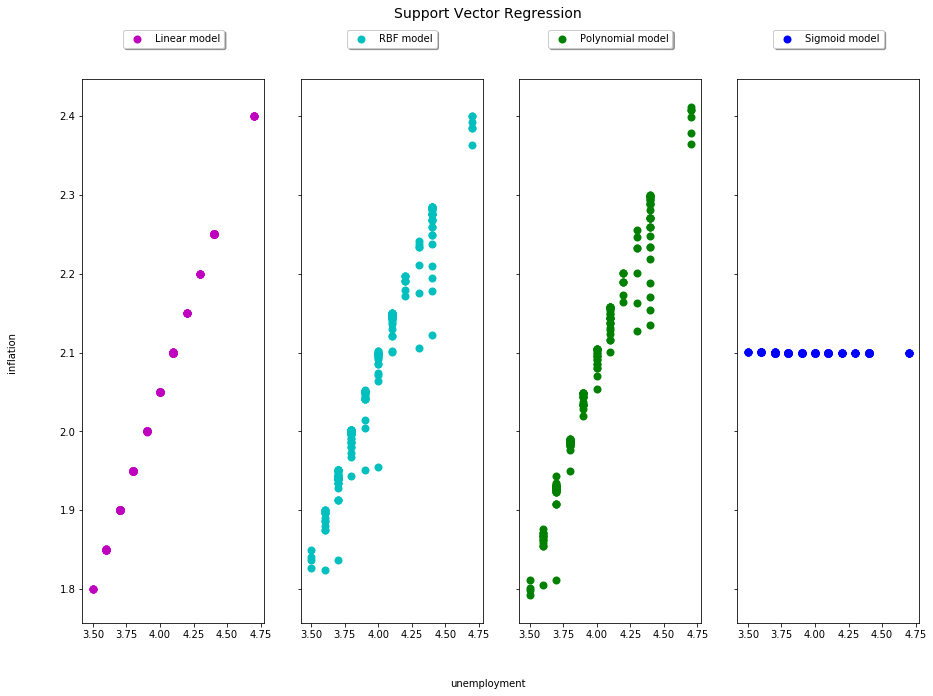

In [698]:
#import matplotlib.pyplot as plt
lw = 2

svrs = [regressor_lin, regressor_rbf, regressor_pol, regressor_sig]
kernel_label = ['Linear', 'RBF', 'Polynomial', 'Sigmoid']
model_color = ['m', 'c', 'g', 'b']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    #axes[ix].plot(Xtest['sentiment'], svr.fit(Xtrain, ytrain).predict(Xtest), color=model_color[ix], lw=lw, 
    axes[ix].scatter(Xtest['unemploy'], svr.fit(Xtrain, ytrain).predict(Xtest), color=model_color[ix], lw=lw, 
                  label='{} model'.format(kernel_label[ix]))
    #axes[ix].scatter(Xtest[svr.support_], ytest[svr.support_], facecolor="none", 
    #                 edgecolor=model_color[ix], s=50, label='{} support vectors'.format(kernel_label[ix]))
    #axes[ix].scatter(Xtest[np.setdiff1d(np.arange(len(Xtest)), svr.support_)],
    #                 ytest[np.setdiff1d(np.arange(len(Xtest)), svr.support_)],
    #                 facecolor="none",edgecolor="k", s=50, 
    #                 label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=1, fancybox=True, shadow=True)
                           
fig.text(0.5, 0.04, 'unemployment', ha='center', va='center')
fig.text(0.06, 0.5, 'inflation', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

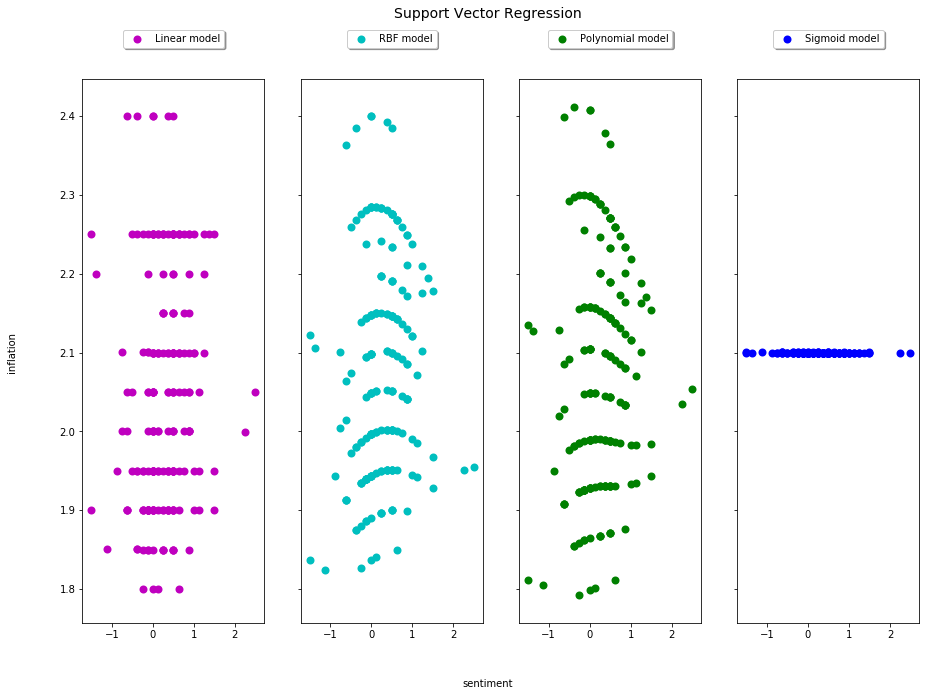

In [699]:
#import matplotlib.pyplot as plt
lw = 2

svrs = [regressor_lin, regressor_rbf, regressor_pol, regressor_sig]
kernel_label = ['Linear', 'RBF', 'Polynomial', 'Sigmoid']
model_color = ['m', 'c', 'g', 'b']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].scatter(Xtest['sentiment'], svr.fit(Xtrain, ytrain).predict(Xtest), color=model_color[ix], lw=lw, 
    #axes[ix].plot(Xtest['unemploy'], svr.fit(Xtrain, ytrain).predict(Xtest), color=model_color[ix], lw=lw, 
                  label='{} model'.format(kernel_label[ix]))
    #axes[ix].scatter(Xtest[svr.support_], ytest[svr.support_], facecolor="none", 
    #                 edgecolor=model_color[ix], s=50, label='{} support vectors'.format(kernel_label[ix]))
    #axes[ix].scatter(Xtest[np.setdiff1d(np.arange(len(Xtest)), svr.support_)],
    #                 ytest[np.setdiff1d(np.arange(len(Xtest)), svr.support_)],
    #                 facecolor="none",edgecolor="k", s=50, 
    #                 label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=1, fancybox=True, shadow=True)
                           
fig.text(0.5, 0.04, 'sentiment', ha='center', va='center')
fig.text(0.06, 0.5, 'inflation', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()